In [1]:
install.packages("igraph")

also installing the dependency ‘cpp11’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
M1=matrix(rep(0,49),nrow=7)
colnames(M1)=c("A","B","C","D","E","F","G")
rownames(M1)=c("A","B","C","D","E","F","G")
M1[1,2]=1
M1[1,4]=1
M1[2,3]=1
M1[2,4]=1
M1[3,4]=1
M1[4,5]=1
M1[4,6]=1
M1[4,7]=1
M1[6,1]=1
M1[6,7]=1
M1

,A,B,C,D,E,F,G
A,0,1,0,1,0,0,0
B,0,0,1,1,0,0,0
C,0,0,0,1,0,0,0
D,0,0,0,0,1,1,1
E,0,0,0,0,0,0,0
F,1,0,0,0,0,0,1
G,0,0,0,0,0,0,0


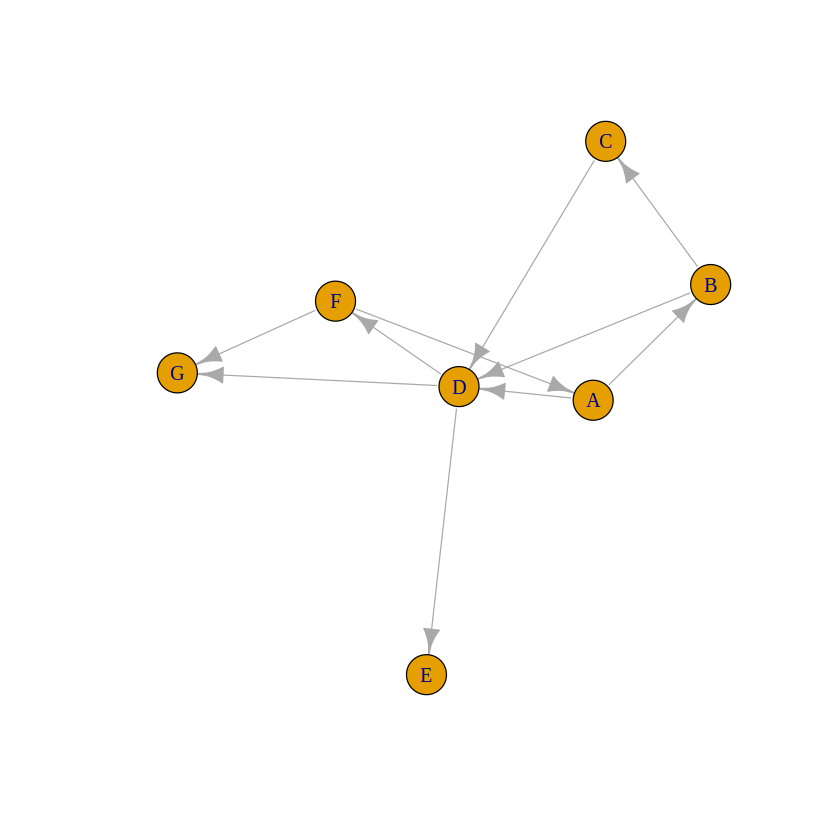

In [4]:
g1=graph_from_adjacency_matrix(M1,mode="directed")
plot(g1)

Warning message:
“`graph()` was deprecated in igraph 2.1.0.
ℹ Please use `make_graph()` instead.”


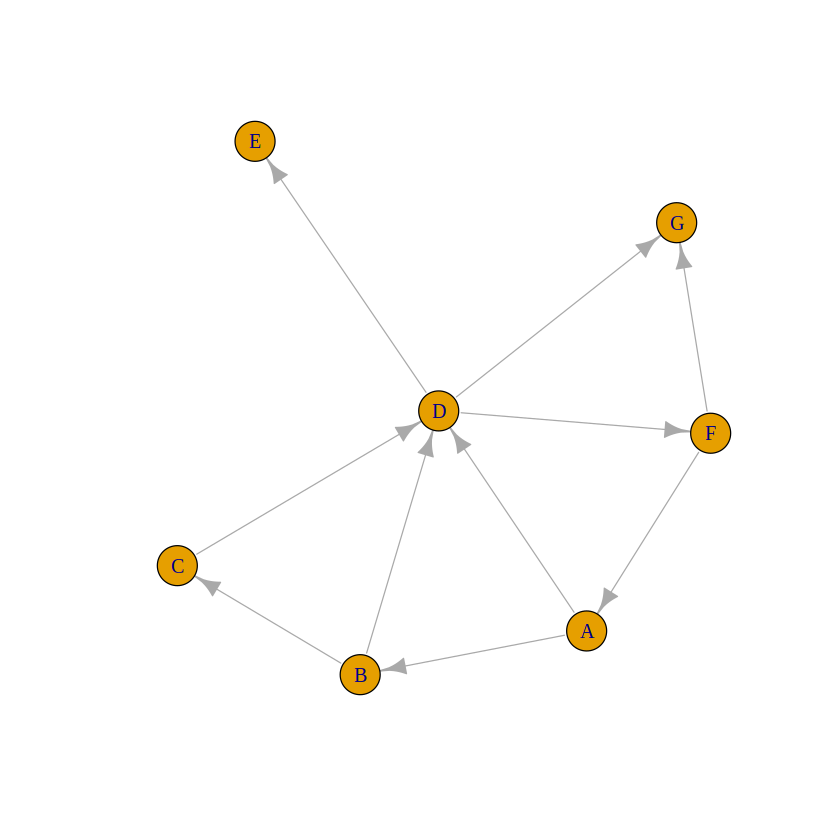

In [5]:
listAretes=c("A","B","A","D","B","C","C","D","B","D","D","F","F","G","D","E","D","G","F","A")
g1=graph(edges=listAretes,directed = TRUE)
plot(g1)

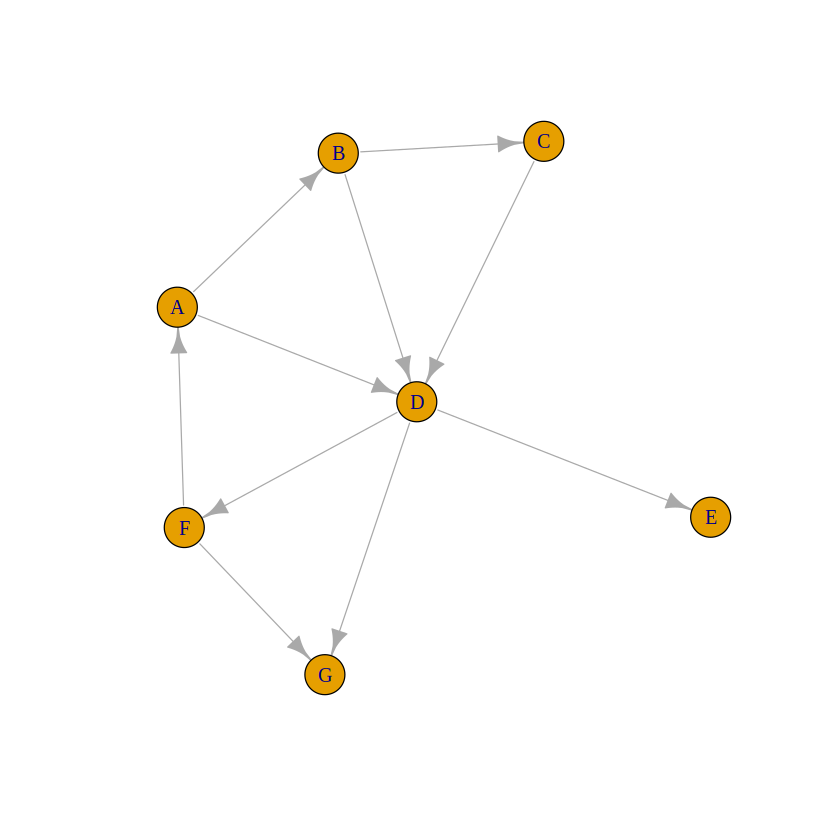

In [6]:
#listAretes=c("A","B","A","D","B","C","C","D","B","D","D","F","F","G","D","E","D","G","F","A")
g1.0=make_graph(edges=listAretes, directed=TRUE)
plot(g1.0)

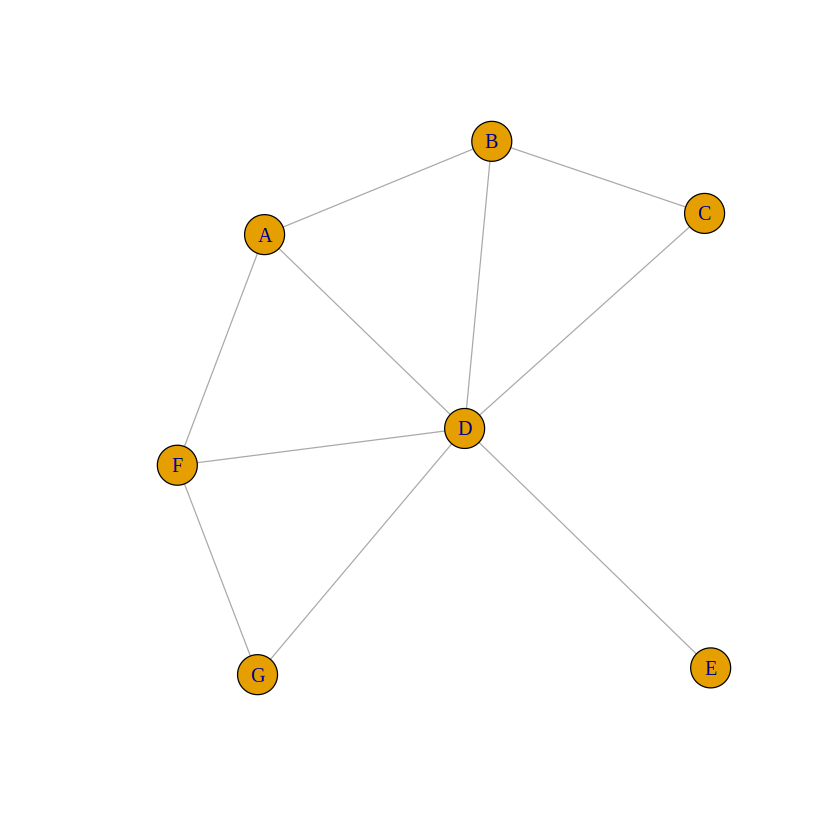

In [7]:
g2=graph(edges = listAretes, directed = FALSE)
plot(g2)

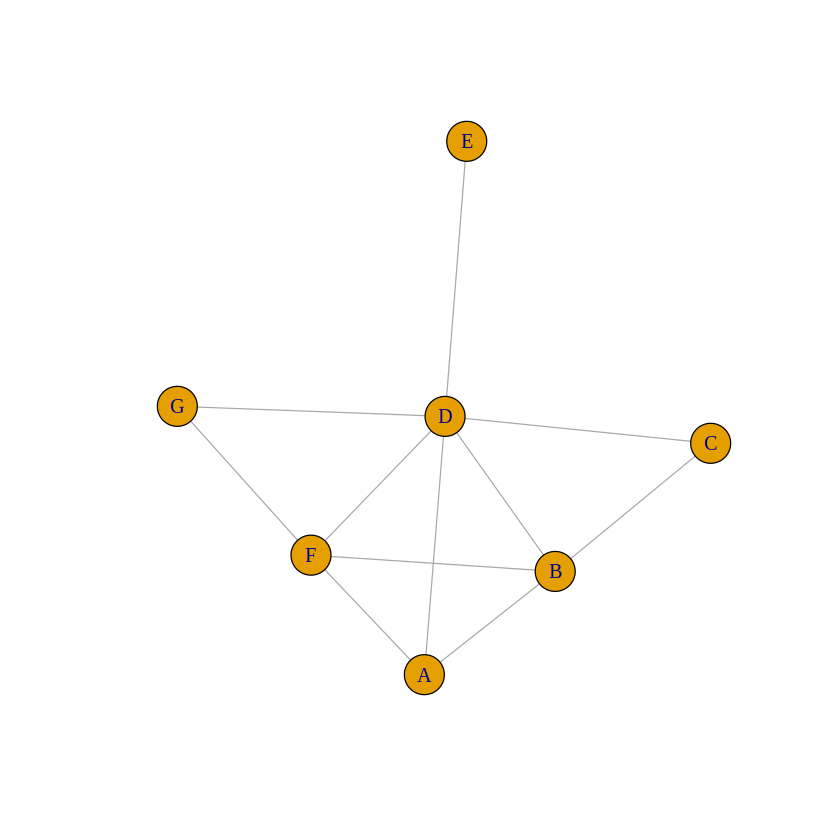

In [9]:
g3=add.edges(g2,c(5,2))
plot(g3)

In [10]:
# Afficher les informations sur le graphe
cat("Nombre de sommets :", vcount(g1), "\n")
cat("Nombre d'arêtes :", ecount(g1), "\n")
cat("Chemins les plus courts :\n")
print(shortest.paths(g1))

Nombre de sommets : 7 
Nombre d'arêtes : 10 
Chemins les plus courts :


Warning message:
“`shortest.paths()` was deprecated in igraph 2.0.0.
ℹ Please use `distances()` instead.”


  A B D C F G E
A 0 1 1 2 1 2 2
B 1 0 1 1 2 2 2
D 1 1 0 1 1 1 1
C 2 1 1 0 2 2 2
F 1 2 1 2 0 1 2
G 2 2 1 2 1 0 2
E 2 2 1 2 2 2 0


In [12]:
# Obtenir les matrices d'adjacence
M1 = get.adjacency(g1)
M2 = as_adj(g2)

# Afficher les matrices d'adjacence
print(M1)
print(M2)

Warning message:
“`get.adjacency()` was deprecated in igraph 2.0.0.
ℹ Please use `as_adjacency_matrix()` instead.”


Warning message:
“`as_adj()` was deprecated in igraph 2.1.0.
ℹ Please use `as_adjacency_matrix()` instead.”


7 x 7 sparse Matrix of class "dgCMatrix"
  A B D C F G E
A . 1 1 . . . .
B . . 1 1 . . .
D . . . . 1 1 1
C . . 1 . . . .
F 1 . . . . 1 .
G . . . . . . .
E . . . . . . .
7 x 7 sparse Matrix of class "dgCMatrix"
  A B D C F G E
A . 1 1 . 1 . .
B 1 . 1 1 . . .
D 1 1 . 1 1 1 1
C . 1 1 . . . .
F 1 . 1 . . 1 .
G . . 1 . 1 . .
E . . 1 . . . .


In [13]:
puissance=function(M,n){
  M1=M
  for (i in 1:(n-1)){
    M1=M1%*%M
  }
  return(M1)
}

In [15]:
print(puissance(M1,3))
print(puissance(M2,3))

7 x 7 sparse Matrix of class "dgCMatrix"
  A B D C F G E
A 1 . 1 . 1 2 1
B 1 . . . 1 2 1
D . 1 1 . . . .
C 1 . . . . 1 .
F . . 1 1 1 1 1
G . . . . . . .
E . . . . . . .
7 x 7 sparse Matrix of class "dgCMatrix"
   A B  D C F G E
A  4 7 10 3 7 3 2
B  7 4  9 5 4 4 2
D 10 9  8 8 9 8 6
C  3 5  8 2 4 2 1
F  7 4  9 4 4 5 2
G  3 4  8 2 5 2 1
E  2 2  6 1 2 1 .


In [18]:
# Fonction pour calculer la fermeture transitive
mat.fermtrans = function(M) {
  n = nrow(M)
  ferm = M
  for (k in 1:n) {
    for (i in 1:n) {
      for (j in 1:n) {
        ferm[i, j] = ferm[i, j] | (ferm[i, k] & ferm[k, j])
      }
    }
  }
  return(ferm)
}

# Calcul des fermetures transitives
fermM1 = mat.fermtrans(as.matrix(M1))
fermM2 = mat.fermtrans(as.matrix(M2))

# Affichage des résultats
print(fermM1)
print(fermM2)

  A B D C F G E
A 1 1 1 1 1 1 1
B 1 1 1 1 1 1 1
D 1 1 1 1 1 1 1
C 1 1 1 1 1 1 1
F 1 1 1 1 1 1 1
G 0 0 0 0 0 0 0
E 0 0 0 0 0 0 0
  A B D C F G E
A 1 1 1 1 1 1 1
B 1 1 1 1 1 1 1
D 1 1 1 1 1 1 1
C 1 1 1 1 1 1 1
F 1 1 1 1 1 1 1
G 1 1 1 1 1 1 1
E 1 1 1 1 1 1 1


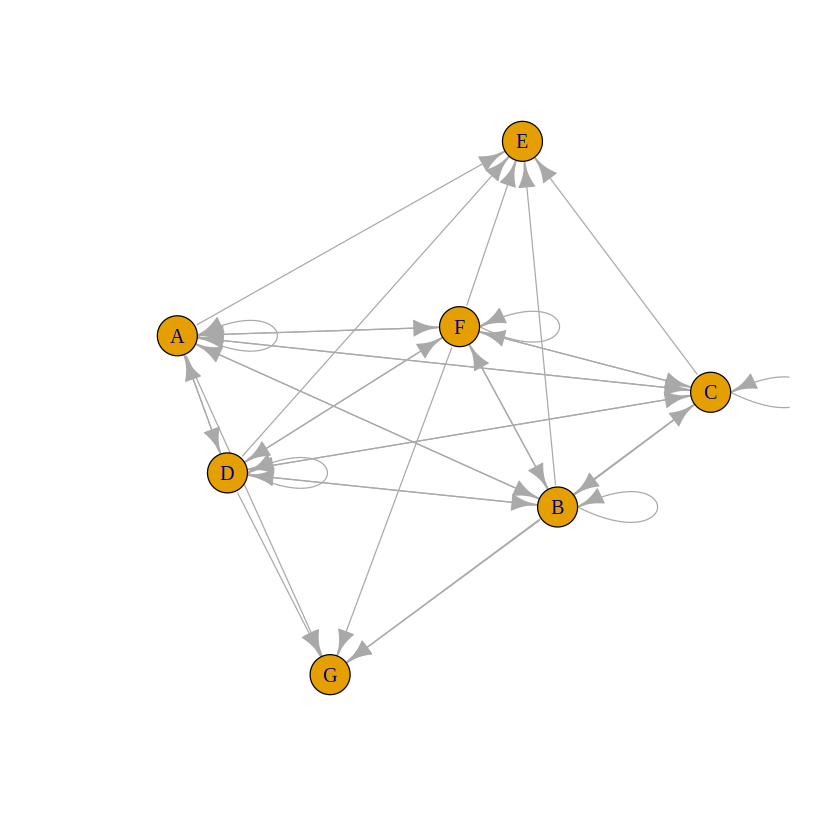

In [20]:
fermg1=graph_from_adjacency_matrix(fermM1,mode="directed")
plot(fermg1)

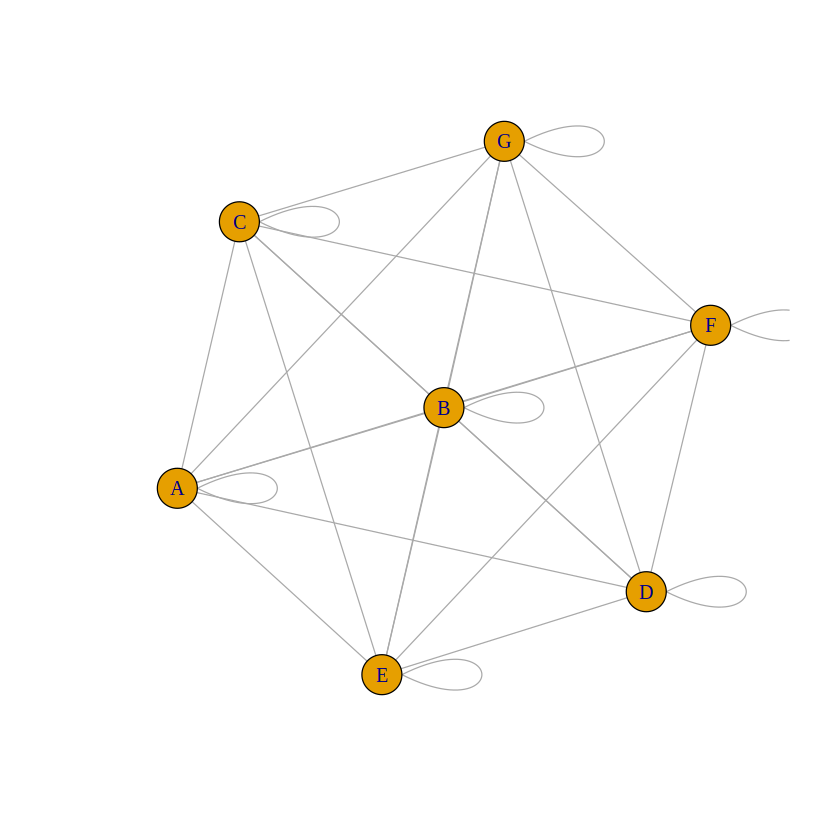

In [22]:
fermg2=graph_from_adjacency_matrix(fermM2,mode="undirected")
plot(fermg2)

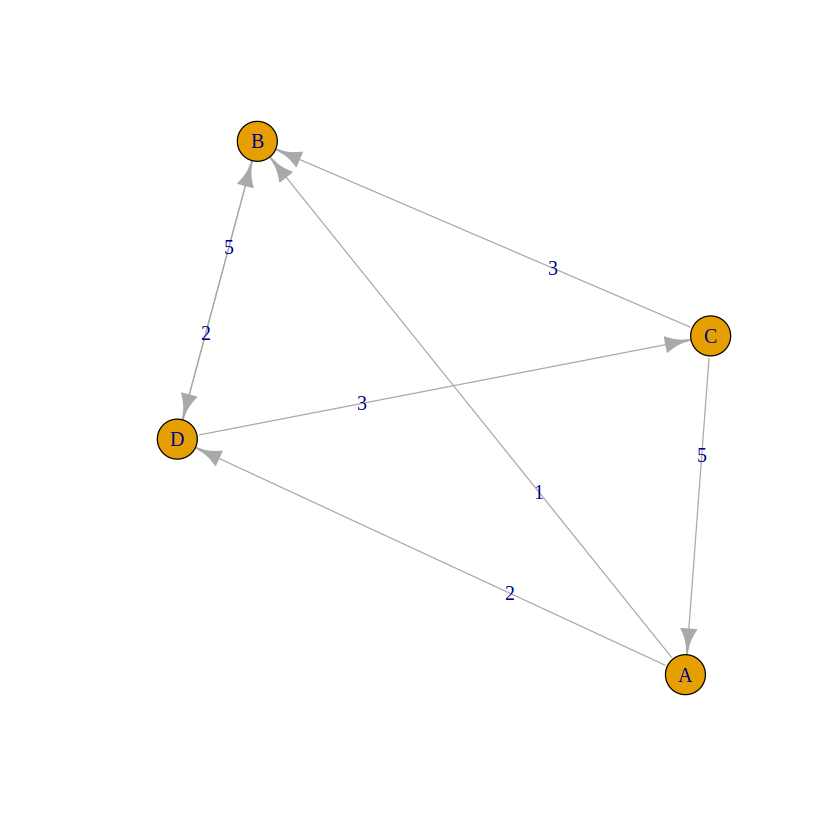

In [29]:
M=cbind(c(0,0,5,0)
       ,c(1,0,3,2)
       ,c(0,0,0,3)
       ,c(2,5,0,0))
colnames(M)=rownames(M)=c("A","B","C","D")
g=graph.adjacency(M,mode="directed",weighted=TRUE)
plot(g,edge.label=E(g)$weight)

In [25]:
shortest.paths(g,mode='out')

,A,B,C,D
A,0,1,5,2
B,13,0,8,5
C,5,3,0,7
D,8,2,3,0


In [26]:
shortest_paths(g,from=2,to=1,mode='out')

$vpath
$vpath[[1]]
+ 4/4 vertices, named, from 97e5a52:
[1] B D C A


$epath
NULL

$predecessors
NULL

$inbound_edges
NULL


In [28]:
shortest_paths(g,from=2,to=1,mode='out',algorithm="dijkstra")

$vpath
$vpath[[1]]
+ 4/4 vertices, named, from 97e5a52:
[1] B D C A


$epath
NULL

$predecessors
NULL

$inbound_edges
NULL


In [ ]:
M=cbind(c(0,0,5,0)#first columns
       ,c(1,0,3,2)
       ,c(0,0,0,3)
       ,c(2,5,0,0))
M

0,1,0,2
0,0,0,5
5,3,0,0
0,2,3,0


$vpath
$vpath[[1]]
+ 5/8 vertices, named, from 15ebb1c:
[1] A E D C G


$epath
NULL

$predecessors
NULL

$inbound_edges
NULL


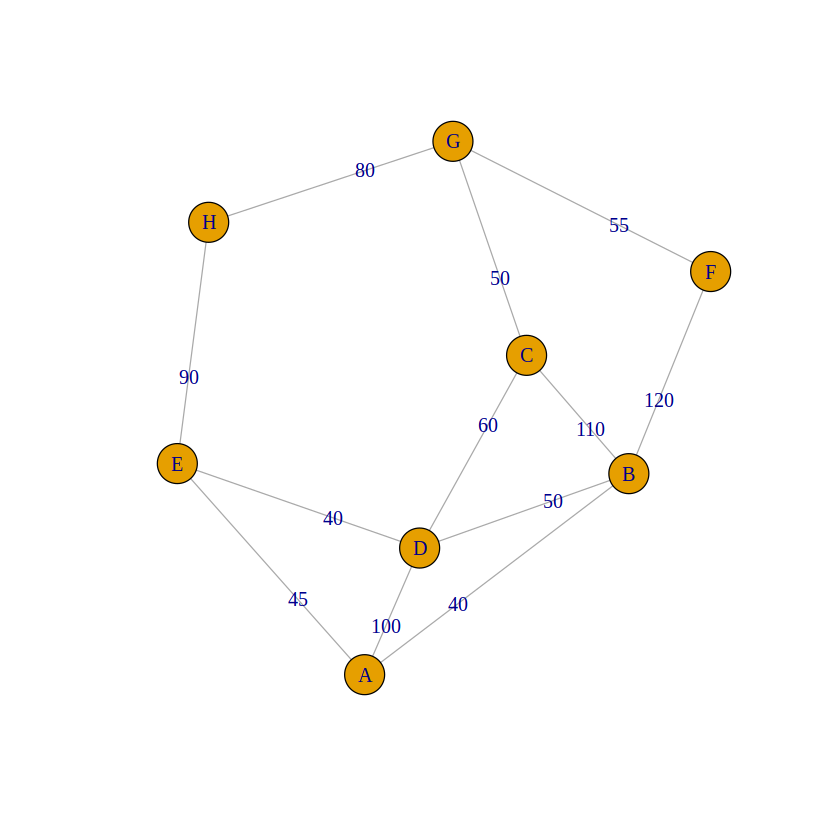

In [31]:
M = rbind(
  c(0,40,0,100,45,0,0,0),
  c(40,0,110,50,0,120,0,0),
  c(0,110,0,60,0,0,50,0),
  c(100,50,60,0,40,0,0,0),
  c(45,0,0,40,0,0,0,90),
  c(0,120,0,0,0,0,55,0),
  c(0,0,50,0,0,55,0,80),
  c(0,0,0,0,90,0,80,0)
)

colnames(M) = rownames(M) = c("A", "B", "C", "D", "E", "F", "G", "H")

g = graph.adjacency(M, mode = 'undirected', weighted = TRUE)

plot(g, edge.label = E(g)$weight)

shortest_paths(g, from = 1, to = 7, algorithm = "dijkstra")
